# Declaration of Originality

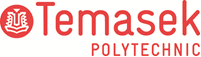

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Ong Yu Zhen (2401283C)
* Tutorial Group                : P05
* Tutor						    : Kian Eng Ong
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [ ]:
## Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import joblib
from pathlib import Path

RANDOM_STATE = 42


imports all required libraries used to build, evaluate, and deploy the supervised machine learning solution for early student at-risk detection. Only scikit-learn is used for model implementation

# 1. Business Understanding


**Problem Background**

In many educational institutions, student performance issues are often identified only after students have already failed or performed poorly in final assessments. At that stage, intervention becomes reactive rather than preventive, limiting the effectiveness of support measures.

Teachers and school administrators typically rely on:
- Manual observation
- Past examination results
- Subjective judgement

These methods are time-consuming, inconsistent across classes, and difficult to scale for large student populations. As a result, some struggling students may go unnoticed until it is too late.

**Why This Problem Matters**

Early identification of at-risk students is critical because academic difficulties often develop gradually over time. Poor early performance can lead to loss of motivation, disengagement, and reduced academic confidence. Timely intervention has been shown to significantly improve learning outcomes and student well-being.

Without an effective early warning system, schools risk higher failure rates, increased dropout likelihood, and greater emotional and academic stress among students.

**Goal**

The goal of this project is to develop a machine learning system that can identify students who are at risk of failing their academic course at an early stage. By predicting academic risk before final examinations, schools and educators can intervene early and provide targeted support to students who need it most.

**Proposed Solution**

This project proposes a machine learning-based early warning system that predicts whether a student is at risk of failing based on historical and behavioural data.

The system uses information such as:
- Previous academic grades
- Study time and attendance
- Past failures
- upport factors (e.g. family and school support)

Using this data, the model classifies students into two categories:
- At Risk
- Not At Risk

This enables educators to focus their attention and resources on students who require early support.

**How the Solution Works (High-Level)**
Historical student data is collected and analysed to identify patterns associated with academic failure. These patterns are learned using machine learning techniques. When new student information is provided, the trained model predicts the likelihood that the student is at risk of failing.

The prediction can then be used by educators to trigger early interventions such as extra lessons, academic counselling, or mentorship programmes. The system is designed to support, rather than replace, teachers’ professional judgement by providing data-driven insights.

**Benefits of the Solution**

For Students
- Early support before failure occurs
- Improved academic confidence and outcomes
- Reduced stress and disengagement

For Educators
- Objective and consistent risk assessment
- Better prioritisation of limited support resources
- Reduced reliance on manual monitoring

For Institutions
- Improved pass rates
- Early identification of systemic learning issues
- Data-driven academic planning

**Business Value**

The proposed solution transforms academic risk detection from a reactive process into a proactive strategy. By enabling early intervention, educational institutions can improve student outcomes, reduce failure rates, and deliver more personalised and effective academic support.

# 2. Data Understanding

## 2.1 Load dataset

In [40]:
## Read *.csv file into pandas DataFrame
import pandas as pd

# Load both datasets
df_mat = pd.read_excel("student-mat.xlsx")
df_por = pd.read_excel("student-por.xlsx")

# Add subject column (only difference between datasets)
df_mat["subject"] = "Math"
df_por["subject"] = "Portuguese"

# Merge (stack rows)
df = pd.concat([df_mat, df_por], ignore_index=True)

print("Merged dataset shape:", df.shape)
display(df.head())




Merged dataset shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


student-mat and student-por datasets were loaded and combined into a single DataFrame. New column "subject" was added to distinguish between the two subjets before merging. Datasets were stacked vertically 

After merging 1044 student records & 34 attributed (1044x34)
df.head() -> first five rows displayed 

## 2.2 Summary Statistics

In [41]:
## Understand the type of variable for each column
# Display data types
display(df.dtypes)

# Separate feature types
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)




school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
subject       object
dtype: object

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


overview of how each feature is stored internally . The feature are automatically separated into CAtegorical features (object data type) and Numerical feature (integer values ) to ensure scalability and reduce the risk of manual classification errors . The clear separation of feature types allows the use of a Column

Categorical Features - qualitative information , cannot be used directly by some machine learning algorithms . They need encoding such as one-hot encoding during preprocessing to convert them into numerical format

Numerical Features - quantitative information , can be analyzed using statistical summaries , correlations and distributions 

**Numerical features will be analysed using summary statistics, histograms, box plots, and correlation analysis**

**Categorical features will be analysed using frequency counts and bar charts to understand class distributions**

In [42]:
## Check for missing data
# Check for missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
display(missing_values)



school        0
goout         0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
Dalc          0
sex           0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
activities    0
paid          0
famsup        0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
subject       0
dtype: int64

Check for missing data before exploratory analysis and model training . Missing dara can negatively affect model performance , introduce bias and lead to unreliable predictions . 
The output shows that all columns contain zero missing values . This indicated that dataset is complete and well-structured with no missing entries across all features . 
This implies that 
- no imputation strategies (mean, median, mode) are required
- no rows or columns need to be removed due to missing data 
- the risk of introducing bias through imputation is eliminated

In [88]:
# Check for duplicate records
print("Number of duplicate rows:", df.duplicated().sum()) # counting thhe number of duplicate rows


Number of duplicate rows: 0


There are no duplicate student records in the dataset
Each row represents a unique student instance
No deduplication is required

In [44]:
##Check value ranges (sanity checks)

# Check min and max for key numerical columns
key_numeric_cols = ["age", "absences", "G1", "G2", "G3"]

display(df[key_numeric_cols].agg(["min", "max"]))


,age,absences,G1,G2,G3
min,15,0,0,0,0
max,22,75,19,19,20


Check min and max of subset (critical variables) to check for data entry errors . 

G1, G2, G3 - Core academic indicators 

absences - Directly related to academic risk 

age - Demographic sanity check 

In [85]:
df[numerical_cols].describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000


Summary statistics  of the central tendency, spread, and range of numerical features
Observations : 
Age
- Mean age is approximately 16.7 years
- values range from 15 to 22, consistent with secondary school students
- Indicates a relatively homogeneous age group, suggesting age alone may not be a strong predictor but can provide contextual information

Parental Education (Medu, Fedu)
education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Mean values around 2–3 on a 0–4 scale
- Indicates moderate parental education levels on average
- These features may influence academic outcomes indirectly through home support and expectations

Study and Travel Time
- Study time median = 2 (moderate study duration)
- Travel time is generally low, with most students falling in the shortest categories
- Suggests that time spent studying may be more influential than commute time for academic risk

Failures
- Median and 75th percentile = 0
- Mean is low (≈0.26), indicating most students have no prior failures
- However, the presence of non-zero values suggests this feature may be a **strong discriminator between at-risk and not-at-risk students**

Family Relationship & Lifestyle Indicators
- famrel median = 4, suggesting generally positive family relationships
- freetime and goout show moderate values, indicating balanced social activity
- Dalc (weekday alcohol) has a low median of 1, while Walc (weekend alcohol) is slightly higher, reflecting typical student behaviour patterns

Absences
- Minimum = 0, maximum = 75
- Large range indicates high variability in attendance
- High absence counts may represent meaningful behavioural risk factors rather than data errors

Academic Performance (G1, G2, G3)
- Grades span the full scale from 0 to 20
- Median values suggest average performance in the mid-range
- These features are expected to be highly predictive of academic risk

Conclusion : 
- Several features show non-normal or skewed distributions (e.g. absences, failures)
- Logistic Regression may benefit from feature scaling
- Tree-based models (Random Forest, Gradient Boosting) are well-suited to handle these distributions
- Prior failures and attendance patterns are likely to be strong predictors of the at_risk target


In [45]:
## Check unique values for categorical features
# Check unique values for selected categorical columns
for col in ["sex", "subject", "schoolsup", "famsup"]:
    print(f"{col}: {df[col].unique()}")


sex: ['F' 'M']
subject: ['Math' 'Portuguese']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']


Checking unique values ensures that categorical features to ensure that 
- they have low and manageable cardinality 
- Contain no unexpected or corrupted categories (outliers)
- check suitability for encoding techniques such as One-Hot encoding without causing dimensionality explosion

In [46]:
## Cardinality check for categorical features
# Cardinality of categorical features
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


school: 2 unique values
sex: 2 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
subject: 2 unique values


Checking number of unique values in categorical feature . provides a quick overview of how many distinct categories each feature contains.

There are Binary Features (2 unique values) and Low-to-Moderate Cardinality Features (more than 2 )
highest-cardinality categorical features (Mjob, Fjob) contain only five categories, which is considered low and manageable.
- No category grouping or dimensionality reduction is required

In [47]:
## Check for null data 
# Check for missing (null) values in each column
null_counts = df.isnull().sum()
display(null_counts)
# Show only columns with missing values
display(null_counts[null_counts > 0])



school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

Series([], dtype: int64)

A secondary check for missing and null values was performed after dataset merging and exploratory analysis to verify that no preprocessing steps introduced data inconsistencies. 

In [48]:
## Describe data distribution
# Summary statistics
# Summary statistics for all features
display(df.describe(include="all").T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


holistic overview of the dataset by generating summary statistics for both numerical and categorical features

In [49]:
key_numeric_cols = ["age", "absences", "G1", "G2", "G3"]
display(df[key_numeric_cols].describe().T)


,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
absences,1044.0,4.434866,6.210017,0.0,0.0,2.0,6.0,75.0
G1,1044.0,11.213602,2.983394,0.0,9.0,11.0,13.0,19.0
G2,1044.0,11.246169,3.285071,0.0,9.0,11.0,13.0,19.0
G3,1044.0,11.341954,3.864796,0.0,10.0,11.0,14.0,20.0


In [50]:
display(df[key_numeric_cols].std())


age         1.239975
absences    6.210017
G1          2.983394
G2          3.285071
G3          3.864796
dtype: float64

focused analysis was conducted on key numerical features that are most relevant to academic performance and risk prediction:
age, absences, G1, G2, and G3 allows for clearer interpretation and better modelling decisions.

Age

- Mean age ≈ 16.7 years
- Range: 15 to 22
- Standard deviation ≈ 1.24
This indicates a relatively narrow age range, suggesting that age alone may not strongly differentiate at-risk students but provides useful demographic context.

Absences

- Mean ≈ 4.43, median = 2
- Range: 0 to 75
- Standard deviation ≈ 6.21

Absences exhibit high variability and a right-skewed distribution. While many students have low absence counts, a small number of students show extremely high absenteeism. This suggests that absences may be a strong behavioural indicator of academic risk rather than noise.

Academic Grades (G1, G2, G3)
- Mean grades are consistently around 11–11.3
- Grades span the full scale from 0 to 20
- Standard deviation increases slightly from G1 → G3:
- G1 around 2.98
- G2 around 3.29
- G3 around 3.86

This increasing variability indicates that student performance becomes more divergent over time, reinforcing the importance of early indicators such as G1 and G2 for predicting final outcomes.



In [51]:
display(df[key_numeric_cols].skew())


age         0.434028
absences    3.741347
G1          0.077922
G2         -0.497357
G3         -0.985965
dtype: float64

Skewness measures the asymmetry of a distribution . Help to potential outliers

Absences
- Exhibits strong positive skew
- Most students have low absence counts, while a small number have very high absences
- These extreme values likely represent meaningful behavioural risk, not noise

Academic Grades (G1, G2, G3)
- G1 is nearly symmetric, indicating consistent early performance
- G2 and G3 show increasing negative skew, meaning more students cluster toward higher grades
- This suggests that performance gaps widen over time, reinforcing the importance of early indicators

Highly skewed features such as absences may affect linear models such as Logistic Regression

In [52]:
for col in ["sex", "subject", "schoolsup", "famsup"]:
    print(f"\nDistribution of {col}:")
    display(df[col].value_counts())


Distribution of sex:


sex
F    591
M    453
Name: count, dtype: int64


Distribution of subject:


subject
Portuguese    649
Math          395
Name: count, dtype: int64


Distribution of schoolsup:


schoolsup
no     925
yes    119
Name: count, dtype: int64


Distribution of famsup:


famsup
yes    640
no     404
Name: count, dtype: int64

the code calculates frequency counts using value_counts(). This provides insight into how student records are distributed across categories

Sex
- Female: 591 students
- Male: 453 students
The dataset shows a slight predominance of female students, but overall gender distribution is relatively balanced. This suggests that sex alone is unlikely to introduce significant bias in model training.

Subject
- Portuguese: 649 students
- Math: 395 students
The Portuguese subject has more records than Math, reflecting the original dataset sizes. Including the subject feature allows the model to account for subject-specific performance differences.

School Support (schoolsup)
- No: 925 students
- Yes: 119 students
Only a small proportion of students receive additional school support. This imbalance suggests that schoolsup may be an important indicator of academic difficulty, as students receiving support are more likely to be struggling.

Family Support (famsup)
- Yes: 640 students
- No: 404 students
Most students report having family support. This feature may provide contextual information about the home environment and its potential influence on academic outcomes.

In [89]:
df[numerical_cols].quantile([0.1, 0.9])


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0.1,15.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,7.0,8.0
0.9,18.0,4.0,4.0,2.0,3.0,1.0,5.0,5.0,5.0,3.0,4.0,5.0,12.0,15.0,15.0


10th percentile (0.1) and 90th percentile (0.9) for all numerical features to understand extreme but valid behaviour
- 0.1 (10%) → “What do the lowest 10% of students look like?”
- 0.9 (90%) → “What do the highest 10% of students look like?”

Absences
- 10th percentile = 0
- 90th percentile = 12

This tells us:
- 90% of students have 12 or fewer absences
- Values above 12 are extreme, but not necessarily errors

Previously : 
- Absences have high skew (~3.7)
- High standard deviation (~6.2)

Quantiles confirm this visually in numbers:
- Most students cluster near 0
- A long right tail exists

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

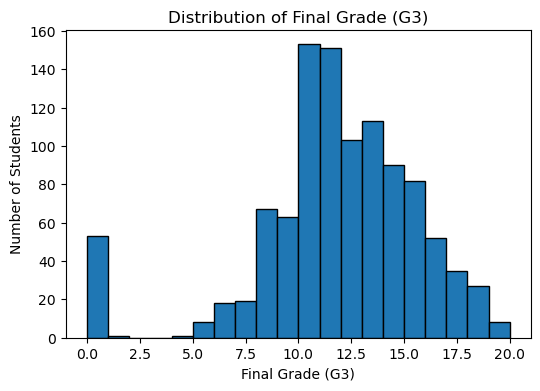

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

In [90]:
## Understanding distribution of target
import matplotlib.pyplot as plt

# Distribution of final grade (G3)
plt.figure(figsize=(6,4))
plt.hist(df["G3"], bins=20, edgecolor="black")
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

# Summary for interpretation
df["G3"].describe()


This histogram visualises the distribution of the final grade (G3), which represents students’ final academic performance. 
Histogram shows that 
- Most students score between 10 and 15, indicating that the majority pass the course
- The distribution is left-skewed, with fewer students achieving very low grades
- A visible cluster of students near 0 represents students who failed or did not complete the course
- Grades span the full valid range from 0 to 20, confirming realistic grading behaviour

With statistics it shows 
- Mean around 11.34 , average student performance is just above the pass threshold
- Median = 11 , half of students score below 11
- Min = 0 , indicates complete failure for some students
- 25% = 10 , bottom quartile is close to failing
- 75% = 14 , top quartile performs comfortably above pass

Students scoring below the pass threshold  G3 < 10 are at high academic risk

The distribution supports a binary classification framing rather than regression

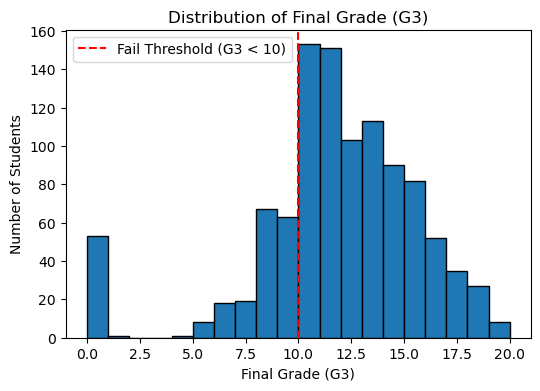

In [91]:
plt.figure(figsize=(6,4))
plt.hist(df["G3"], bins=20, edgecolor="black")
plt.axvline(x=10, color="red", linestyle="--", label="Fail Threshold (G3 < 10)")
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.legend()
plt.show()


histogram visualises the distribution of the final grade (G3) and overlays a fail threshold at G3 < 10 . this clearly distinguish failing and passing students
The histogram shows that:
- Most students score above 10, indicating that the majority pass the course
- A distinct group of students score below 10, forming a clear lower tail in the distribution
- The red dashed line at G3 = 10 cleanly separates low-performing students from the rest
- Students to the left of the threshold represent those who fail or are at high risk of failing, while students to the right represent those who pass.

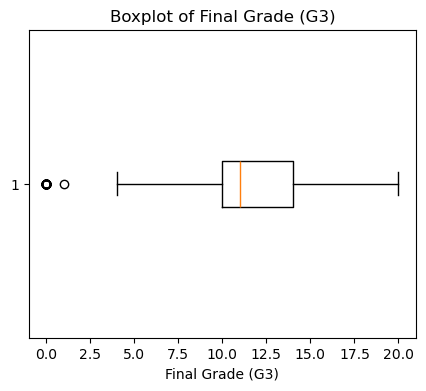

In [93]:
plt.figure(figsize=(5,4))
plt.boxplot(df["G3"], vert=False)
plt.title("Boxplot of Final Grade (G3)")
plt.xlabel("Final Grade (G3)")
plt.show()


The boxplot highlights a concentrated group of low-performing students distinct from the main population, reinforcing the suitability of G3 for defining academic risk.

- the median final grade is around 11, consistent with earlier summary statistics
- the interquartile range (IQR) spans approximately from 10 to 14, indicating that the middle 50% of students cluster around the passing threshold
- a lower tail is clearly visible, with several outliers near 0, representing students who failed or disengaged
- the upper whisker extends close to 20, confirming the presence of high-performing students

The presence of low-end outliers is particularly important
- These values are not errors but represent students with severe academic difficulty
- The separation between the lower tail and the central mass reinforces the existence of a distinct at-risk group
- This supports the decision to define academic risk using a pass/fail threshold

- The distribution confirms that the target variable contains meaningful variability
- Outliers will be retained, as they reflect real student outcomes
- The clear lower tail justifies transforming G3 into a binary classification target

### 2.3.1.2 Understanding distribution of features

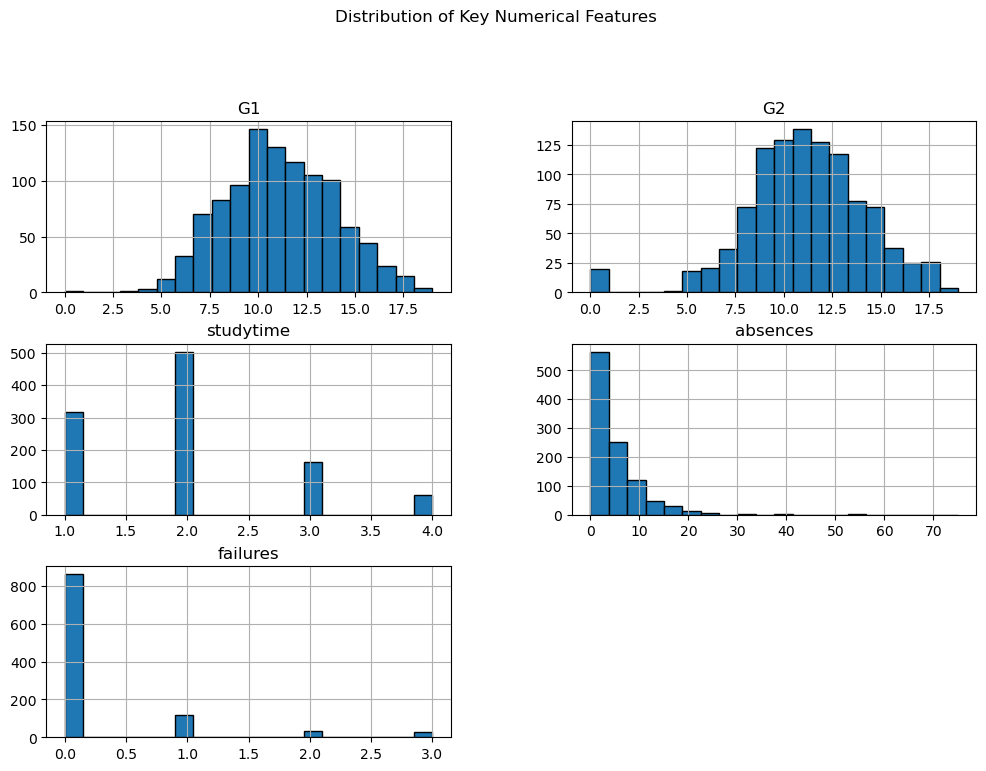

In [ ]:
## Understanding distribution of features
#  important numerical features
num_features = ["G1", "G2", "studytime", "absences", "failures"]

df[num_features].hist(
    figsize=(12,8),
    bins=20,
    edgecolor="black"
)
plt.suptitle("Distribution of Key Numerical Features", y=1.02)
plt.show()


the feature distributions indicate meaningful variability across academic and behavioural factors, providing a strong foundation for modelling academic risk.

**Individual Feature Distributions**
G1 (First Period Grade)
- The distribution is approximately bell-shaped, centred around scores of 10–12
- Most students score within a moderate range, with fewer extreme low or high values
- This indicates that G1 provides a stable early signal of academic performance

G2 (Second Period Grade)
- Similar to G1, G2 follows a roughly normal distribution
- Slightly more spread compared to G1, suggesting performance differences become clearer over time
- This reinforces G2 as a strong predictor of final outcomes

Study Time (studytime)
- The distribution is discrete, with most students clustered at lower values
- The majority of students report low to moderate study time
- This suggests limited variation in study habits, but higher study time may still be informative for distinguishing certain student groups

Absences
- The distribution is heavily right-skewed
- Most students have few absences, while a small number exhibit very high absenteeism
- These extreme values are likely to represent genuine behavioural risk rather than noise
This confirms earlier statistical findings and highlights absences as a potentially strong non-academic risk factor.

Past Failures (failures)
- The majority of students have zero past failures
- A small number of students have one or more failures, creating a highly imbalanced distribution
- Despite the imbalance, this feature is meaningful, as prior failures often signal persistent academic difficulty

Conclusion 
- Academic grades (G1, G2) show smooth, well-distributed patterns suitable for modelling
- Behavioural features (absences, failures) exhibit skewed distributions but contain strong risk signals
- Discrete features such as studytime and failures reflect real-world educational constraints rather than data issues

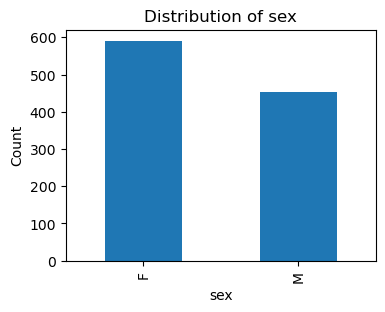

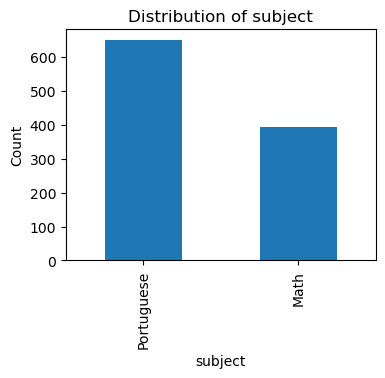

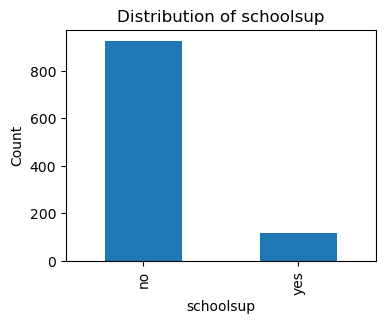

In [ ]:
# categorical distributions
for col in ["sex", "subject", "schoolsup"]:
    plt.figure(figsize=(4,3))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

features analysed are sex, subject, and schoolsup, as they represent demographic, academic, and institutional support factors 
Sex
- Female students slightly outnumber male students
- The distribution remains relatively balanced overall
- This suggests that gender representation is reasonable and unlikely to introduce significant bias during model training.

Subject
- The Portuguese subject contains more students than Math
- This difference reflects the original dataset composition
- Including the subject feature allows the model to account for subject-specific academic patterns without requiring separate models.

School Support (schoolsup)
- The majority of students do not receive additional school support
- Only a small subset of students receive extra academic assistance
This imbalance is meaningful rather than problematic. Students receiving school support are likely those already identified as struggling, making this feature potentially informative for risk prediction.

Conclusion: 
- All categorical features have low cardinality, making them suitable for one-hot encoding
- No category is extremely rare or invalid
- Observed imbalances reflect real-world educational conditions rather than data quality issues

### 2.3.2 Understanding relationship between variables

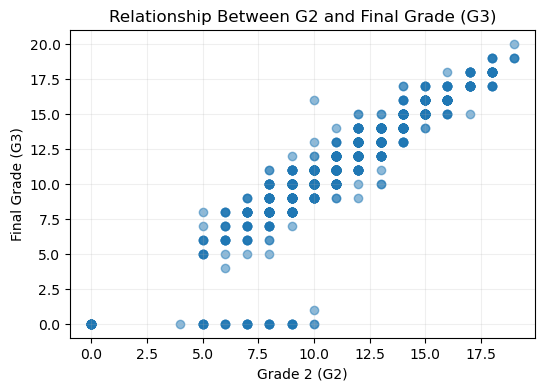

In [60]:
## Understanding relationship between variables
# 1) Relationship between G2 and G3 (scatter plot)
plt.figure(figsize=(6,4))
plt.grid(True, alpha=0.2)
plt.scatter(df["G2"], df["G3"], alpha=0.5)
plt.title("Relationship Between G2 and Final Grade (G3)")
plt.xlabel("Grade 2 (G2)")
plt.ylabel("Final Grade (G3)")
plt.show()




<Figure size 600x400 with 0 Axes>

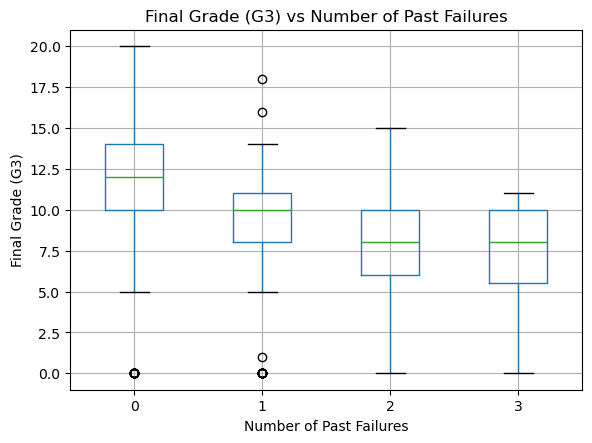

In [61]:
# 2) Final Grade (G3) vs Number of Past Failures (boxplot)
plt.figure(figsize=(6,4))
df.boxplot(column="G3", by="failures")
plt.title("Final Grade (G3) vs Number of Past Failures")
plt.suptitle("")
plt.xlabel("Number of Past Failures")
plt.ylabel("Final Grade (G3)")
plt.show()

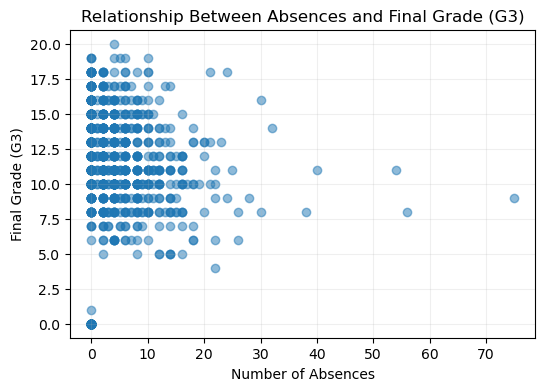

In [62]:
# 3) Relationship between Absences and Final Grade (G3) (scatter plot)
plt.figure(figsize=(6,4))
plt.grid(True, alpha=0.2)
plt.scatter(df["absences"], df["G3"], alpha=0.5)
plt.title("Relationship Between Absences and Final Grade (G3)")
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade (G3)")
plt.show()


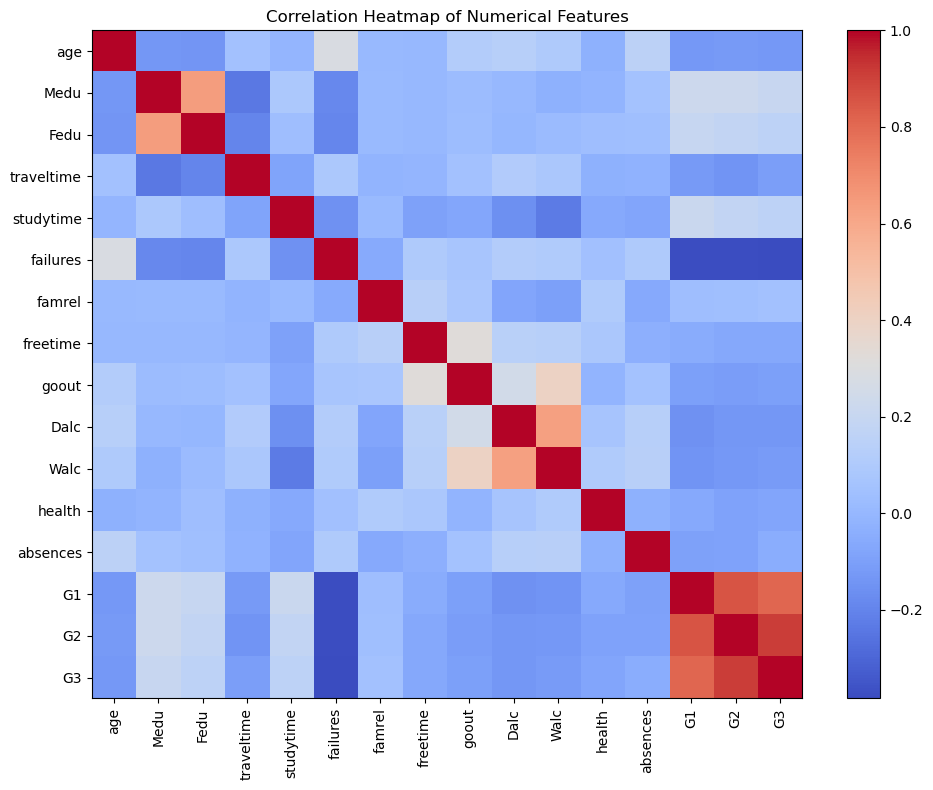

In [63]:
# 4) Correlation Heatmap of Numerical Features
import numpy as np

num_df = df.select_dtypes(include=np.number)
corr = num_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [64]:
## Clean data
# Make a copy of the dataset so we don't accidentally modify the original
df_clean = df.copy()

# Remove duplicate rows if any
df_clean = df_clean.drop_duplicates()

# Sanity check: absences should not be negative
if "absences" in df_clean.columns:
    df_clean = df_clean[df_clean["absences"] >= 0]

print("Shape after cleaning:", df_clean.shape)

# Confirm no missing values
df_clean.isnull().sum()

# Create target variable: at_risk (1 = at risk, 0 = not at risk)
df_clean["at_risk"] = (df_clean["G3"] < 10).astype(int)

# Remove G3 from features to prevent data leakage
df_clean = df_clean.drop(columns=["G3"])



Shape after cleaning: (1044, 34)


The final grade (G3) is used only to derive the target variable and is removed from the feature set to prevent data leakage during model training.

In [65]:
# Identify categorical and numerical columns
categorical_cols = df_clean.select_dtypes(include="object").columns.tolist()
numerical_cols = df_clean.select_dtypes(exclude="object").columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'at_risk']


Note: Variables such as studytime and failures are ordinal and kept as numerical features


In [66]:
print("Final cleaned dataset shape:", df_clean.shape)
df_clean.head()


Final cleaned dataset shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,subject,at_risk
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,Math,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,Math,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,Math,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,Math,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,Math,0


## 3.2 Train-Test Split

In [67]:
## 3.2 Train-Test Split

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_clean.drop(columns=["at_risk"])
y = df_clean["at_risk"]

# Split into training and test sets (stratified to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Output logs (important for rubric)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

print("\nTarget distribution (overall):")
print(y.value_counts(normalize=True))

print("\nTarget distribution (train):")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution (test):")
print(y_test.value_counts(normalize=True))


Training set size: (835, 33)
Test set size: (209, 33)

Target distribution (overall):
at_risk
0    0.779693
1    0.220307
Name: proportion, dtype: float64

Target distribution (train):
at_risk
0    0.779641
1    0.220359
Name: proportion, dtype: float64

Target distribution (test):
at_risk
0    0.779904
1    0.220096
Name: proportion, dtype: float64


# 4. Modelling

### 4.2 Train Model

In [68]:
## 4.2 Train Model
# Initialise and train two distinct models with clear logs

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Identify categorical and numerical columns from the training set only
categorical_cols = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols = X_train.select_dtypes(exclude="object").columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Preprocessing:
# - OneHotEncode categorical features (turn text categories into 0/1 columns)
# - Keep numerical features as-is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols),
    ]
)

# -------------------------
# Model 1: Logistic Regression (interpretable baseline ML model)
# -------------------------
log_reg_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
    ]
)

print("\nTraining Model 1: Logistic Regression...")
log_reg_pipeline.fit(X_train, y_train)
print(" Logistic Regression training completed.")

# -------------------------
# Model 2: Random Forest (strong non-linear model, handles interactions well)
# -------------------------
rf_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            n_jobs=-1,
            class_weight="balanced_subsample"
        ))
    ]
)

print("\nTraining Model 2: Random Forest...")
rf_pipeline.fit(X_train, y_train)
print(" Random Forest training completed.")

# Quick confirmation that models can predict (sanity check)
print("\nSanity check predictions:")
print("LogReg sample preds:", log_reg_pipeline.predict(X_test.head(5)))
print("RF sample preds:", rf_pipeline.predict(X_test.head(5)))


Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Training Model 1: Logistic Regression...
 Logistic Regression training completed.

Training Model 2: Random Forest...
 Random Forest training completed.

Sanity check predictions:
LogReg sample preds: [1 0 0 0 0]
RF sample preds: [1 0 0 0 0]


# 5. Model Evaluation


===== Logistic Regression =====
              precision    recall  f1-score   support

 Not At Risk       0.97      0.88      0.92       163
     At Risk       0.68      0.89      0.77        46

    accuracy                           0.89       209
   macro avg       0.82      0.89      0.85       209
weighted avg       0.90      0.89      0.89       209



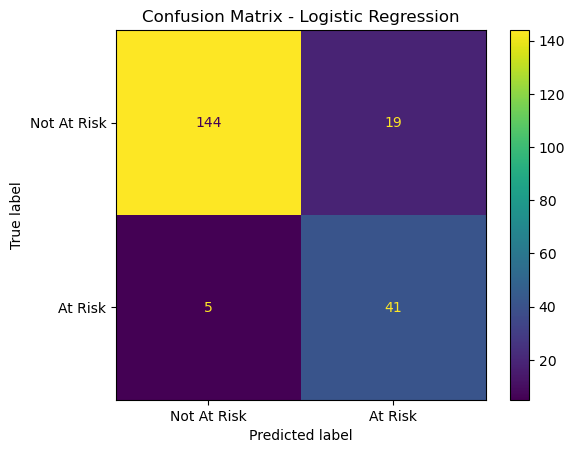


===== Random Forest =====
              precision    recall  f1-score   support

 Not At Risk       0.94      0.94      0.94       163
     At Risk       0.78      0.78      0.78        46

    accuracy                           0.90       209
   macro avg       0.86      0.86      0.86       209
weighted avg       0.90      0.90      0.90       209



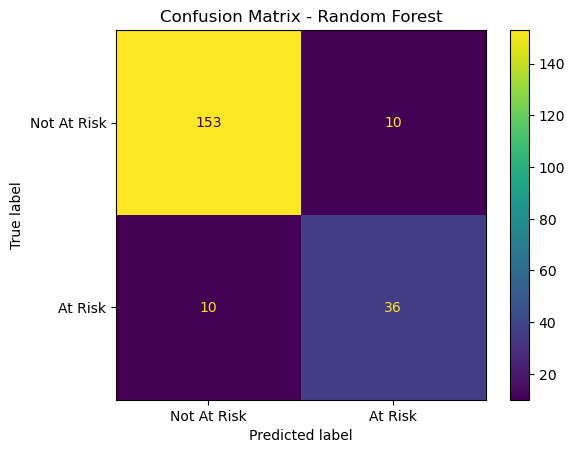

In [69]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate a trained model and return key performance metrics
    """
    y_pred = model.predict(X_test)

    print(f"\n===== {model_name} =====")
    print(classification_report(y_test, y_pred, target_names=["Not At Risk", "At Risk"]))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Not At Risk", "At Risk"]
    )
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
    }

# Evaluate both models
logreg_results = evaluate_model(
    log_reg_pipeline, X_test, y_test, "Logistic Regression"
)

rf_results = evaluate_model(
    rf_pipeline, X_test, y_test, "Random Forest"
)


In [70]:
results_df = pd.DataFrame([logreg_results, rf_results])
results_df



#need to compare this table before and after (Matrix that I use)


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.885167,0.683333,0.891304,0.773585
1,Random Forest,0.904306,0.782609,0.782609,0.782609


In [71]:
import joblib
from pathlib import Path
import pandas as pd

Path("artifacts").mkdir(exist_ok=True)

# Save the trained pipeline model (includes preprocessing!)
joblib.dump(log_reg_pipeline, "artifacts/model.joblib")

# Save a default row with the SAME columns as X_train
# This prevents Streamlit from missing columns.
default_row = X_train.iloc[[0]].copy()
joblib.dump(default_row, "artifacts/default_row.joblib")

print("Saved artifacts/model.joblib and artifacts/default_row.joblib")


Saved artifacts/model.joblib and artifacts/default_row.joblib


In [73]:
## New data
# This section demonstrates how the trained model can be used
# to predict academic risk for a new, unseen student.
# In deployment, these values will be provided by users
# through the Streamlit web interface.
import joblib
import pandas as pd
from pathlib import Path

# Always load artifacts from the same folder
ART = Path("artifacts")

# Load the trained pipeline model (includes preprocessing)
model = joblib.load(ART / "model.joblib")

# Load the default row template (same columns as training features)
default_row = joblib.load(ART / "default_row.joblib")

# ---- New data (modify a copy) ----
new_student = default_row.copy()
new_student["studytime"] = 2
new_student["failures"] = 1
new_student["absences"] = 5

# Convert to 1-row DataFrame
new_student_df = new_student.copy()

# ---- Predict ----
prediction = model.predict(new_student_df)[0]
print("Prediction (0=Not at risk, 1=At risk):", prediction)


Prediction (0=Not at risk, 1=At risk): 0


## Iterative model development


In [74]:
## Further feature engineering / feature selection
#Show that removing or refining features improves generalisation and reduces leakage/noise
# Rationale:
# G1 and G2 are previous exam scores which may not always be
# available early in the academic term.
# Removing them tests whether the model can still identify
# at-risk students using behavioural and support features.

X_train_fe = X_train.drop(columns=["G1", "G2"], errors="ignore")
X_test_fe  = X_test.drop(columns=["G1", "G2"], errors="ignore")

print("Original feature count:", X_train.shape[1])
print("After feature selection:", X_train_fe.shape[1])

Original feature count: 33
After feature selection: 31


In [76]:
#Train Logistic Regression again, but with fewer features.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 1) Feature selection: remove G1 and G2 (safe even if they don't exist)
X_train_fe = X_train.drop(columns=["G1", "G2"], errors="ignore")
X_test_fe  = X_test.drop(columns=["G1", "G2"], errors="ignore")

print("Original feature count:", X_train.shape[1])
print("After feature selection:", X_train_fe.shape[1])

# 2) IMPORTANT: rebuild categorical/numerical lists based on the NEW feature set
categorical_cols_fe = X_train_fe.select_dtypes(include="object").columns.tolist()
numerical_cols_fe   = X_train_fe.select_dtypes(exclude="object").columns.tolist()

print("\nCategorical columns (FE):", categorical_cols_fe)
print("Numerical columns (FE):", numerical_cols_fe)

# 3) Rebuild a NEW preprocessor that matches X_train_fe (no G1/G2)
preprocessor_fe = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_fe),
        ("num", "passthrough", numerical_cols_fe),
    ],
    remainder="drop"
)

# 4) Train Logistic Regression again using the NEW preprocessor
log_reg_fe = Pipeline(steps=[
    ("preprocessing", preprocessor_fe),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

print("\nTraining Logistic Regression (Feature-Reduced)...")
log_reg_fe.fit(X_train_fe, y_train)
print("✅ Logistic Regression (Feature-Reduced) training completed.")


Original feature count: 33
After feature selection: 31

Categorical columns (FE): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Numerical columns (FE): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Training Logistic Regression (Feature-Reduced)...
✅ Logistic Regression (Feature-Reduced) training completed.


In [79]:
##RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# IMPORTANT: Use preprocessor_fe (built from X_train_fe), not the old preprocessor
rf_pipeline_fe = Pipeline(steps=[
    ("preprocessing", preprocessor_fe),
    ("model", RandomForestClassifier(random_state=42))
])

# Hyperparameter search space (max 3 values each — rubric compliant)
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20]
}

# RandomizedSearchCV (tuning 2 hyperparameters)
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline_fe,
    param_distributions=param_grid,
    n_iter=6,
    scoring="recall",       # prioritise catching at-risk students
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Running RandomizedSearchCV for Random Forest (Feature-Reduced)...")
rf_search.fit(X_train_fe, y_train)

print("\n✅ Best parameters:", rf_search.best_params_)
print("✅ Best CV recall:", round(rf_search.best_score_, 4))


Running RandomizedSearchCV for Random Forest (Feature-Reduced)...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

✅ Best parameters: {'model__n_estimators': 300, 'model__max_depth': 10}
✅ Best CV recall: 0.1793


In [80]:
import pandas as pd

cv_results = pd.DataFrame(rf_search.cv_results_)
cv_results[["params", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values("rank_test_score").head(10)


,params,mean_test_score,std_test_score,rank_test_score
2,"{'model__n_estimators': 300, 'model__max_depth...",0.179270,0.022473,1
0,"{'model__n_estimators': 200, 'model__max_depth...",0.173982,0.016115,2
1,"{'model__n_estimators': 200, 'model__max_depth...",0.173982,0.016115,2
3,"{'model__n_estimators': 100, 'model__max_depth...",0.168341,0.050124,4
4,"{'model__n_estimators': 300, 'model__max_depth...",0.157677,0.016046,5
5,"{'model__n_estimators': 300, 'model__max_depth...",0.152212,0.020688,6


In [84]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =========================
# 1) Rebuild BASELINE preprocessor + model (uses X_train)
# =========================
categorical_cols_base = X_train.select_dtypes(include="object").columns.tolist()
numerical_cols_base = X_train.select_dtypes(exclude="object").columns.tolist()

preprocessor_base = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_base),
        ("num", "passthrough", numerical_cols_base),
    ],
    remainder="drop"
)

log_reg_baseline = Pipeline(steps=[
    ("preprocessing", preprocessor_base),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

log_reg_baseline.fit(X_train, y_train)
print("✅ Rebuilt & trained LogReg Baseline")

# =========================
# 2) Evaluate helper
# =========================
def evaluate(model, X, y, name):
    y_pred = model.predict(X)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, zero_division=0),
        "Recall": recall_score(y, y_pred, zero_division=0),
        "F1": f1_score(y, y_pred, zero_division=0),
    }

# =========================
# 3) Evaluate ALL models correctly
#    - Baseline uses X_test
#    - Feature-reduced + tuned RF use X_test_fe
# =========================
results = [
    evaluate(log_reg_baseline, X_test, y_test, "LogReg Baseline (Rebuilt)"),
    evaluate(log_reg_fe, X_test_fe, y_test, "LogReg Feature-Reduced"),
    evaluate(rf_search.best_estimator_, X_test_fe, y_test, "Random Forest Tuned"),
]

results_df = pd.DataFrame(results).sort_values("Recall", ascending=False)
results_df


✅ Rebuilt & trained LogReg Baseline


,Model,Accuracy,Precision,Recall,F1
0,LogReg Baseline (Rebuilt),0.885167,0.683333,0.891304,0.773585
1,LogReg Feature-Reduced,0.708134,0.405063,0.695652,0.512000
2,Random Forest Tuned,0.803828,0.631579,0.260870,0.369231
